In [497]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Load Credit Default File
df = pd.read_csv("C:/Users/protyush.ghosh/Desktop/WA_Fn-UseC_-Accounts-Receivable.csv")
df.head()


,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [498]:
df['Disputed']= df['Disputed'].apply(lambda disputed: 1 if disputed == 'Yes' else 0)
df['PaperlessBill']=df['PaperlessBill'].apply(lambda paperless : 0 if paperless == 'Paper' else 1)

df

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,0,1/15/2013,0,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,1,3/3/2013,1,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,0,7/8/2013,1,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,0,3/17/2013,1,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,1,11/28/2012,0,34,4
5,818,5148-SYKLB,8/28/2013,18104516,1/27/2012,2/26/2012,94.00,1,2/22/2012,0,26,0
6,897,8690-EEBEO,12/5/2012,23864272,8/13/2013,9/12/2013,74.69,0,9/9/2013,1,27,0
7,770,4460-ZXNDN,6/27/2013,27545037,12/16/2012,1/15/2013,75.06,0,1/12/2013,0,27,0
8,770,3831-FXWYK,3/8/2013,28049695,5/14/2012,6/13/2012,80.07,1,7/1/2012,0,48,18
9,897,7654-DOLHO,4/4/2012,32277701,7/1/2013,7/31/2013,48.33,0,7/26/2013,1,25,0


In [499]:
df['PaperlessDate']=pd.to_datetime(df['PaperlessDate'])
df['SettledDate']=pd.to_datetime(df['SettledDate'])
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['DueDate']=pd.to_datetime(df['DueDate'])
df


,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,0,2013-01-15,0,13,0
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,1,2013-03-03,1,36,6
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,0,2013-07-08,1,5,0
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,0,2013-03-17,1,35,5
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,1,2012-11-28,0,34,4
5,818,5148-SYKLB,2013-08-28,18104516,2012-01-27,2012-02-26,94.00,1,2012-02-22,0,26,0
6,897,8690-EEBEO,2012-12-05,23864272,2013-08-13,2013-09-12,74.69,0,2013-09-09,1,27,0
7,770,4460-ZXNDN,2013-06-27,27545037,2012-12-16,2013-01-15,75.06,0,2013-01-12,0,27,0
8,770,3831-FXWYK,2013-03-08,28049695,2012-05-14,2012-06-13,80.07,1,2012-07-01,0,48,18
9,897,7654-DOLHO,2012-04-04,32277701,2013-07-01,2013-07-31,48.33,0,2013-07-26,1,25,0


(2466, 12)
False
False


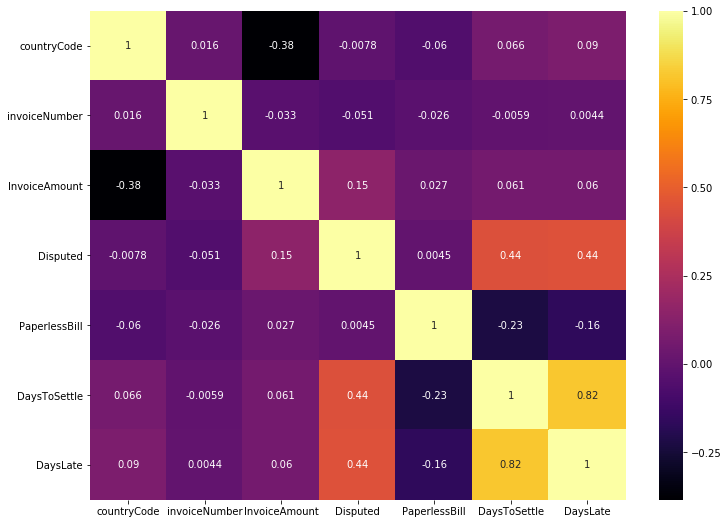

In [500]:
print(df.shape)
print(df.isna().values.any())
print(df.isnull().values.any())
corr = df.corr()

# Set up the matplot figure
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, cmap='inferno', annot=True)

In [501]:
df.describe()

,countryCode,invoiceNumber,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate
count,2466.000000,2.466000e+03,2466.000000,2466.000000,2466.000000,2466.00000,2466.000000
mean,620.446067,4.978431e+09,59.895856,0.227494,0.487835,26.44485,3.442417
std,215.933610,2.884272e+09,20.435838,0.419299,0.499953,12.33493,6.290607
min,391.000000,6.113650e+05,5.260000,0.000000,0.000000,0.00000,0.000000
25%,406.000000,2.528854e+09,46.400000,0.000000,0.000000,18.00000,0.000000
50%,770.000000,4.964228e+09,60.560000,0.000000,0.000000,26.00000,0.000000
75%,818.000000,7.494512e+09,73.765000,0.000000,1.000000,35.00000,5.000000
max,897.000000,9.990244e+09,128.280000,1.000000,1.000000,75.00000,45.000000


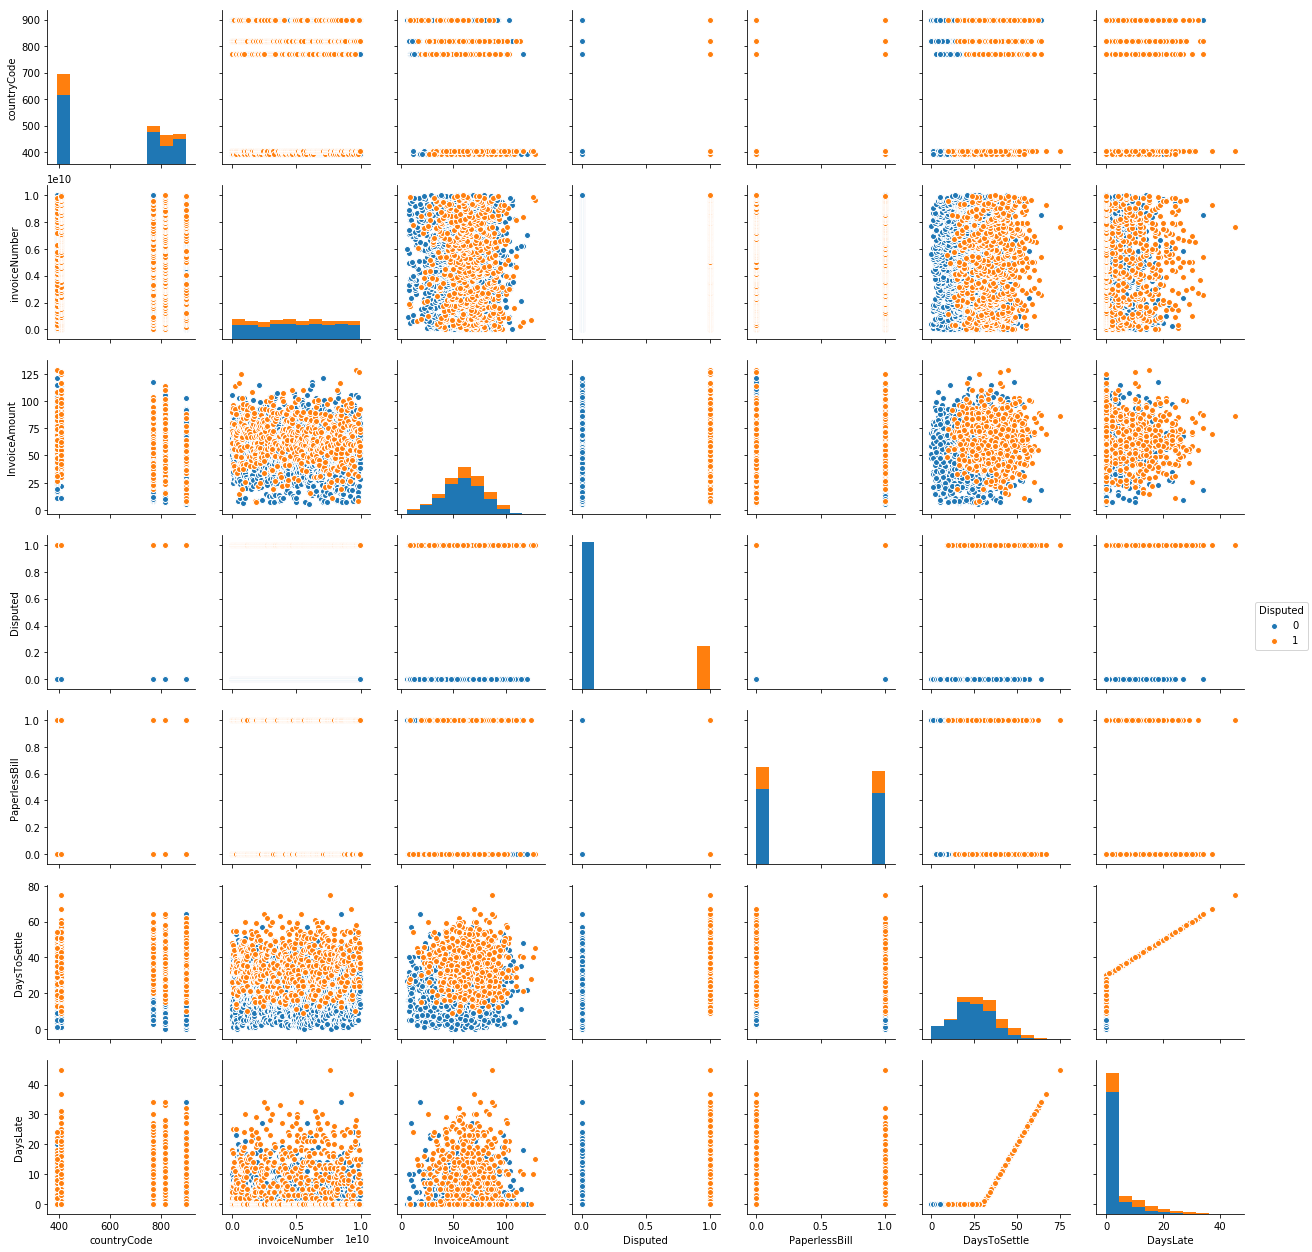

In [502]:
columns = df.columns
sns.pairplot(data=df,hue="Disputed")

In [503]:
df.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,0,2013-01-15,0,13,0
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,1,2013-03-03,1,36,6
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,0,2013-07-08,1,5,0
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,0,2013-03-17,1,35,5
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,1,2012-11-28,0,34,4


In [504]:
df=df.drop(['customerID','PaperlessDate','InvoiceDate','DueDate' ,'SettledDate'],axis=1)
           #'invoiceNumber','PaperlessBill','countryCode','InvoiceAmount'],axis=1)

In [505]:
df.head()

,countryCode,invoiceNumber,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate
0,391,611365,55.94,0,0,13,0
1,406,7900770,61.74,1,1,36,6
2,391,9231909,65.88,0,1,5,0
3,406,9888306,105.92,0,1,35,5
4,818,15752855,72.27,1,0,34,4


In [506]:
y = df['Disputed']

X = df.drop('Disputed',1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

randomState = 5
np.random.seed(randomState)

from sklearn.cross_validation import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.20,random_state=randomState)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.5)

logreg.fit(xTrain, yTrain)
logreg.score(xTest,yTest)


0.791497975708502

In [507]:
y_log_pred_test = logreg.predict_proba(xTest)[:,1]
y_log_pred_train = logreg.predict_proba(xTrain)[:,1]

Logistic Regression - Confusion Matrix : [[347  19]
 [ 84  44]]


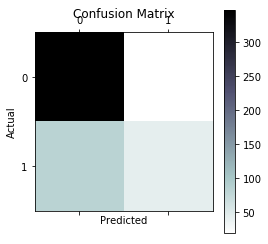

In [508]:
from sklearn import metrics
confusion_matrix_logistic_df=metrics.confusion_matrix(yTest, y_log_pred_test.round())

plot_confusion_matrix(confusion_matrix_logistic_df)
print("Logistic Regression - Confusion Matrix :",confusion_matrix_logistic_df)

In [509]:
log_test_acc=metrics.accuracy_score(yTest, y_log_pred_test.round())

In [510]:
log_train_acc=metrics.accuracy_score(yTrain, y_log_pred_train.round())

print("Training accuracy :",log_train_acc)
print("Test accuracy :",log_test_acc)
from sklearn.metrics import roc_auc_score
roc_auc_score(yTest,y_log_pred_test , average='macro', sample_weight=None)

Training accuracy : 0.805780933063
Test accuracy : 0.791497975709


0.79757940573770492

In [511]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.bone_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [512]:
from sklearn import tree
dcsnTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3,random_state=randomState)
dcsnTree.fit(xTrain,yTrain)
dcsnTree.score(xTest,yTest)
dcsnTree.feature_importances_

array([ 0.02924188,  0.        ,  0.08525704,  0.        ,  0.16566373,
        0.71983734])

Training accuracy : 0.816430020284
Test accuracy : 0.767206477733
Decision Tree - Confusion Matrix : [[355  11]
 [104  24]]


0.77924351092896171

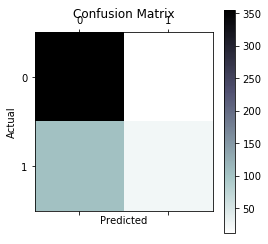

In [513]:
y_dcsn_pred_test = dcsnTree.predict_proba(np.reshape(np.array(xTest),xTest.shape))[:,1]

y_dcsn_pred_train = dcsnTree.predict_proba(np.reshape(np.array(xTrain),xTrain.shape))[:,1]

dcsn_test_acc=metrics.accuracy_score(yTest, y_dcsn_pred_test.round())
dcsn_train_acc=metrics.accuracy_score(yTrain, y_dcsn_pred_train.round())

print("Training accuracy :",dcsn_train_acc)
print("Test accuracy :",dcsn_test_acc)

confusion_matrix_dcsn_df=metrics.confusion_matrix(yTest, y_dcsn_pred_test.round())
print("Decision Tree - Confusion Matrix :",confusion_matrix_dcsn_df)
plot_confusion_matrix(confusion_matrix_dcsn_df)
roc_auc_score(yTest,y_dcsn_pred_test , average='macro', sample_weight=None)

In [514]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=randomState, verbose=0)
rfModel.fit(xTrain,yTrain)
rfModel.score(xTest, yTest)
rfModel.feature_importances_

array([ 0.14849139,  0.03642693,  0.10251347,  0.0017666 ,  0.33707811,
        0.37372351])

Training accuracy : 0.816430020284
Test accuracy : 0.767206477733
Random Forest - Confusion Matrix : [[355  11]
 [104  24]]


0.77924351092896171

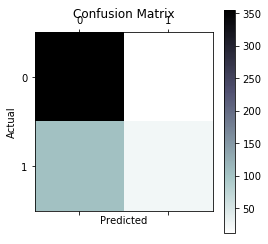

In [515]:
y_rf_pred_test = dcsnTree.predict_proba(np.reshape(np.array(xTest),xTest.shape))[:,1]

y_rf_pred_train = dcsnTree.predict_proba(np.reshape(np.array(xTrain),xTrain.shape))[:,1]

rf_test_acc=metrics.accuracy_score(yTest, y_rf_pred_test.round())
rf_train_acc=metrics.accuracy_score(yTrain, y_rf_pred_train.round())

print("Training accuracy :",rf_train_acc)
print("Test accuracy :",rf_test_acc)

confusion_matrix_rf_df=metrics.confusion_matrix(yTest, y_rf_pred_test.round())
print("Random Forest - Confusion Matrix :",confusion_matrix_rf_df)
plot_confusion_matrix(confusion_matrix_rf_df)
roc_auc_score(yTest,y_rf_pred_test , average='macro', sample_weight=None)